## Titanic - Machine Leaning from disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this project, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

For this project data has been split in to two set, test.csv and train.csv.

The training set should be used to build your machine learning models. 

The test set should be used to see how well your model performs on unseen data. 

In [1]:
#import general packages

import pandas as pd
import numpy as np

# import visualization package
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

#import modeling packges
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
# load dataset

df = pd.read_csv('/home/modernistauto/workspace/data_science_projects/titanic/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Values are missing in 'Age', 'Cabin' and 'Embarked' columns. Only 204 non-null rows are present in Cabin column.

In [4]:
#Descriptive statics of dataframe

df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
#check for duplicate value

df.duplicated().sum()

0

zero duplicate values found in data set

Drop 'Cabin' column as this contain 204 non null values out of 891.

In [6]:
# drop 'Cabin' column
df.drop(columns='Cabin', inplace= True)

### EDA

In [7]:
# survived count
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Only 342 people survived out of 891.

In [8]:
# percentage of Survived

df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Approximately 62% of people didn't survived and only 38% survived the accident

In [9]:
#check count 'Pclass' column

df['Pclass'].value_counts().sort_index().reset_index()

,Pclass,count
0,1,216
1,2,184
2,3,491


In [10]:
#check survived people in each 'Pclass'
surv_class = df.groupby(['Pclass'])['Survived'].sum().reset_index()

surv_class

,Pclass,Survived
0,1,136
1,2,87
2,3,119


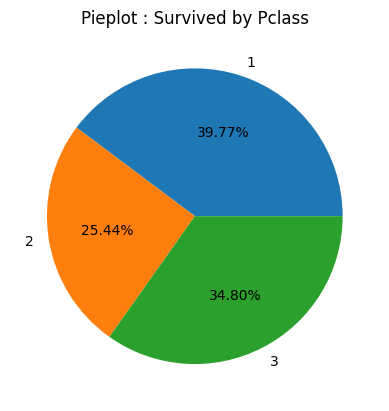

In [11]:
#create pieplot for people survived by Pclass

plt.pie(data= surv_class,x= 'Survived',labels=surv_class['Pclass'],autopct='%1.2f%%')
plt.title('Pieplot : Survived by Pclass')
plt.show()

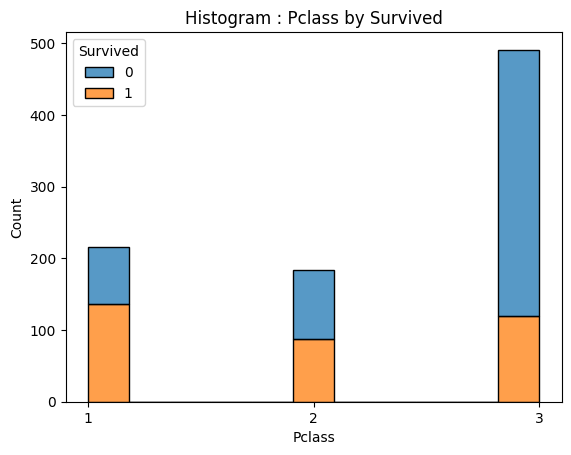

In [12]:
#create a histgram to visualize proportion people survived from each 'Pclass'

sns.histplot(data = df, x = 'Pclass', hue='Survived',multiple='stack')
plt.xticks([1,2,3])
plt.title('Histogram : Pclass by Survived')
plt.show()

People traveled in Pclass '1' and '2' are more likely to survive than people traveled in Pclass '3'

In [13]:
# count men and women in the ship

df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
# Check how many men and women are in survived.
df.groupby(['Survived'])['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [15]:
# find survival rate for both men and women
print(f'Survival rate for men :',round((109/577)*100,2))
print(f'Survival rate for women :',round((233/314)*100,2))

Survival rate for men : 18.89
Survival rate for women : 74.2


Survival rate of women is higher 3 times higher than survival rate of men.

Create a column for 'Age_group' and group people depending on their age group.

In [20]:
#create function to categorizing age group

def age_group(age):

    if age <13:
        return 'child'
    elif (age >12) & (age <19):
        return 'teen'
    elif (age >18) & (age <35):
        return 'young'
    elif (age >34) & (age < 60):
        return 'adult'
    else :
        return 'senior'
    



In [21]:
#filter dataframe with age is not empty
    
df_age = df[~df['Age'].isna()].copy()

In [22]:
df_age['Age_group'] = df_age['Age'].astype(np.int8)
df_age['Age_group'] = df_age['Age_group'].apply(age_group)

In [23]:
df_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,adult
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,young
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,young
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,young
